In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import gen_data
from optimum import  perform_optimization
import numpy as np

this loads the trades from Option Omega

In [138]:
#target_dat = gen_data("C:\\Users\\miche\\Downloads\\trade-log-1030-4.csv.csv")

#target_dat = gen_data("C:\\Users\\miche\\Downloads\\strangle645.csv")
#target_dat = gen_data("C:/Users/miche/Downloads/strangle645.csv")

target_dat = gen_data("C:/Users/miche/Downloads/meic1045.csv",
                     time_weight = {'method': 'linear',  #'linear or exponential
                                  'range': (1.0,1.0)} )

c:\Users\miche\OptionsAnalysis\utils.py:96: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  target_dat = pd.read_csv(
c:\Users\miche\OptionsAnalysis\utils.py:96: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  target_dat = pd.read_csv(


Runs the optionzation functions joe wrote

In [145]:
result = perform_optimization(target_dat =target_dat,
                              min_trades = 40, #  Minimum number of trades for the solution
                              min_trades_boost = 1000, # penality factor for the each trade under the min
                              win_rate_boost = 30,  # how much more or less to emphasize the win rate over total profit

                              )



***********************************************
************   OPTIMIAL VALUES  ***************
***********************************************

VIX OVERNIGHT % CHANGE MIN: -10.3%
VIX OVERNIGHT % CHANGE MAX: 12.33%
SPX GAP MIN: -0.53%
SPX GAP MAX: -0.14%
VIX MIN: 20.83
VIX MAX: 32.44
SPX CHANGE MIN: -1.2%
SPX CHANGE MAX: 0.29%



In [146]:
tst = target_dat[
        (target_dat['VIX_ON_CHANGE'] >= result.x[0]) & (target_dat['VIX_ON_CHANGE'] <= result.x[1]) &
        (target_dat['SPX_ON_CHANGE'] >= result.x[2]) & (target_dat['SPX_ON_CHANGE'] <= result.x[3]) &
        (target_dat['VIX_CURRENT_CLOSE'] >= result.x[4]) & (target_dat['VIX_CURRENT_CLOSE'] <= result.x[5])
    ]

# Drop duplicate dates (keeping the first occurrence)
tst = tst[~tst.index.duplicated(keep='first')]

In [141]:
print( f"Number of Trades : {len(tst)}\nWin Rate: {np.round( (tst['P/L'] > 0).mean()*100, 2) }%\nProfit: ${tst['P/L'].sum()} ")

Number of Trades : 73
Win Rate: 80.82%
Profit: $10657.4 


In [147]:
print( f"Number of Trades : {len(tst)}\nWin Rate: {np.round( (tst['P/L'] > 0).mean()*100, 2) }%\nProfit: ${tst['P/L'].sum()} ")

Number of Trades : 28
Win Rate: 71.43%
Profit: $2766.2 


In [128]:
print( f"Number of Trades : {len(tst)}\nWin Rate: {np.round( (tst['P/L'] > 0).mean()*100, 2) }%\nProfit: ${tst['P/L'].sum()} ")

Number of Trades : 79
Win Rate: 64.56%
Profit: $48542 


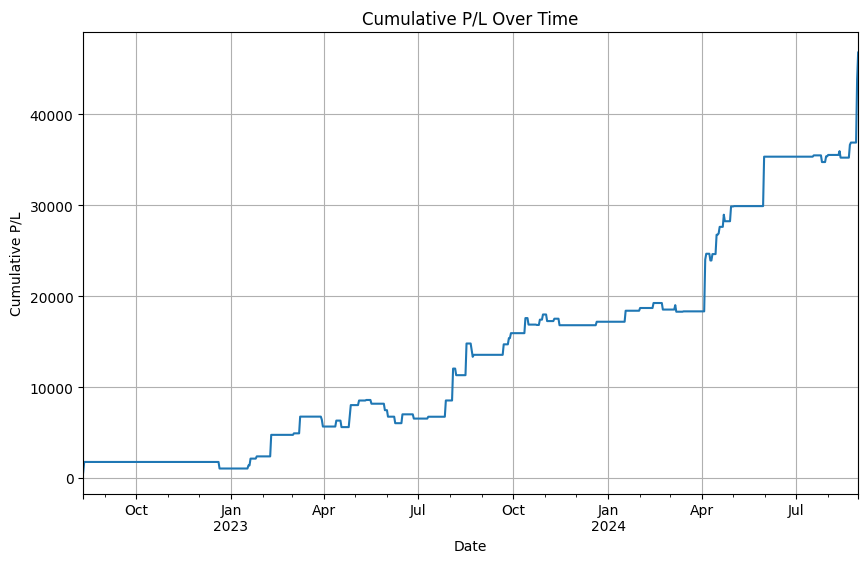

In [115]:
# Generate a full date range from the min to the max date in the DataFrame
full_date_range = pd.date_range(start=tst.index.min(), end=tst.index.max())
tst_reindexed = tst.reindex(full_date_range)
tst_reindexed['P/L'] = tst_reindexed['P/L'].fillna(0)
tst_reindexed['Cumulative P/L'] = tst_reindexed['P/L'].cumsum()

# Plot the Cumulative P/L over time
plt.figure(figsize=(10, 6))
tst_reindexed['Cumulative P/L'].plot(title='Cumulative P/L Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative P/L')
plt.grid(True)
plt.show()

TST is the dataframe created by the optimization, target_dat is the dataframe from OO, also has SPX and VIX merged in

In [8]:
#tst.loc['2024-09-06']
#target_dat['2024-09-05']
tst

CloseDatetime                                               2024-09-06 11:01:00
Opening Price                                                           5506.63
Legs                          1 Sep 6 5555 C BTO 4.25 | 1 Sep 6 5435 P BTO 4.00
Premium                                                                    -825
Closing Price                                                           5454.59
Avg. Closing Cost                                                          -930
Reason For Close                                                      Stop Loss
P/L                                                                         101
No. of Contracts                                                              1
Funds at Close                                                            85032
Margin Req.                                                                 825
Strategy                                                                    NaN
Opening Commissions + Fees              